In [88]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_parquet('./data/yellow_tripdata_2022-01.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [67]:
len(df)

2463931

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page), but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".

Download the data for January and February 2022.

Read the data for January. How many columns are there?

In [6]:
print(f'A1: {len(df.columns)}')

A1: 19


In [8]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [20]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [21]:
df['duration'].head()

0   0 days 00:17:49
1   0 days 00:08:24
2   0 days 00:08:58
3   0 days 00:10:02
4   0 days 00:37:32
Name: duration, dtype: timedelta64[ns]

In [25]:
df['duration_in_minutes'] = df.duration.dt.total_seconds() / 60
df['duration_in_minutes'].head()

0    17.816667
1     8.400000
2     8.966667
3    10.033333
4    37.533333
Name: duration_in_minutes, dtype: float64

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

In [29]:
print(f'A2: {round(df.duration_in_minutes.std(), 2)}')

A2: 46.45


In [30]:
df_new = df[(df.duration_in_minutes >= 1) & (df.duration_in_minutes <= 60)]

Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

In [31]:
print(f'A3: {round(len(df_new) / len(df) * 100)}%')

A3: 98%


In [35]:
df_new.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,duration_in_minutes
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,0 days 00:17:49,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,0 days 00:08:24,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,0 days 00:08:58,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,0 days 00:10:02,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,0 days 00:37:32,37.533333


In [49]:
df_new[['PULocationID', 'DOLocationID']].to_dict(orient='records')[:5]

[{'PULocationID': 142, 'DOLocationID': 236},
 {'PULocationID': 236, 'DOLocationID': 42},
 {'PULocationID': 166, 'DOLocationID': 166},
 {'PULocationID': 114, 'DOLocationID': 68},
 {'PULocationID': 68, 'DOLocationID': 163}]

In [66]:
print(len(df_new['PULocationID'].unique()))
print(len(df_new['DOLocationID'].unique()))

254
261


In [68]:
categorical = ['PULocationID', 'DOLocationID'] 
df_new[categorical] = df_new[categorical].astype(str)

C:\Users\MarkoRadovic\AppData\Local\Temp\ipykernel_12924\3657787186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[categorical] = df_new[categorical].astype(str)


In [69]:
train_dicts = df_new[categorical].to_dict(orient='records')

In [70]:
vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform(train_dicts)

In [71]:
X_train.shape

(2421440, 515)

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries
Fit a dictionary vectorizer
Get a feature matrix from it
What's the dimensionality of this matrix (number of columns)?

In [116]:
print(f'A4: {X_train.shape[1]}')

A4: 515


In [81]:
y_train = df_new['duration_in_minutes']

In [82]:
y_train[:3]

0    17.816667
1     8.400000
2     8.966667
Name: duration_in_minutes, dtype: float64

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [84]:
y_pred = model.predict(X_train)
y_pred.shape

(2421440,)

C:\Users\MarkoRadovic\AppData\Local\Temp\ipykernel_12924\1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
C:\Users\MarkoRadovic\AppData\Local\Temp\ipykernel_12924\1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


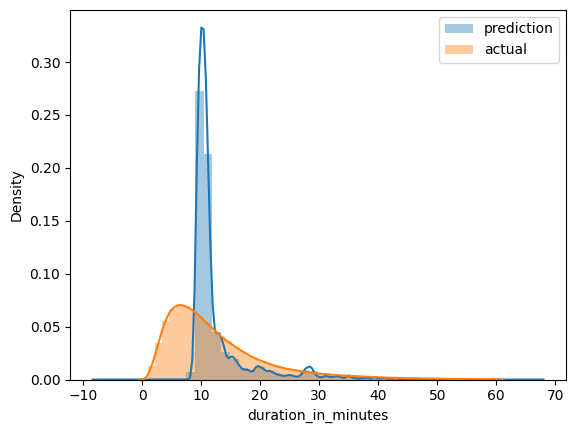

In [87]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters
Calculate the RMSE of the model on the training data
What's the RMSE on train?

In [94]:
print(f'A5: {round(mean_squared_error(y_train, y_pred, squared=False), 2)}')

A5: 6.99


In [101]:
def prepare_dataset(df):
    df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
    df['duration_in_minutes'] = df.duration.dt.total_seconds() / 60
    df_new = df[(df.duration_in_minutes >= 1) & (df.duration_in_minutes <= 60)]
    categorical = ['PULocationID', 'DOLocationID'] 
    df_new[categorical] = df_new[categorical].astype(str)
    y = df_new['duration_in_minutes']
    return df_new[categorical].to_dict(orient='records'), y

In [95]:
df_val = pd.read_parquet('./data/yellow_tripdata_2022-02.parquet')
df_val.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,17.0,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,21.0,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,35.5,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,28.0,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,35.5,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25


In [99]:
len(df_val)

2979431

In [109]:
val_dicts, y_val = prepare_dataset(df_val)

C:\Users\MarkoRadovic\AppData\Local\Temp\ipykernel_12924\943113700.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[categorical] = df_new[categorical].astype(str)


In [110]:
X_val = vectorizer.transform(val_dicts)

In [111]:
X_val.shape

(2918187, 515)

In [112]:
y_val_preds = model.predict(X_val)

In [113]:
print(y_val[:4])
print(y_val_preds[:4])

0    12.433333
1    17.550000
2    23.650000
3    20.083333
Name: duration_in_minutes, dtype: float64
[18.52778307 23.06578208 33.68635854 23.75743618]


C:\Users\MarkoRadovic\AppData\Local\Temp\ipykernel_12924\3382718254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val_preds, label='prediction')
C:\Users\MarkoRadovic\AppData\Local\Temp\ipykernel_12924\3382718254.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val, label='actual')


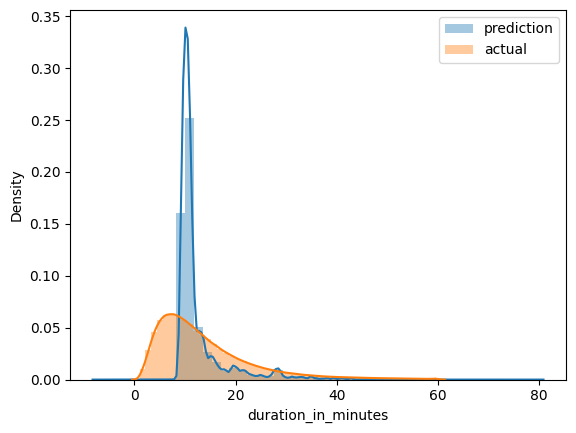

In [114]:
sns.distplot(y_val_preds, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()

Now let's apply this model to the validation dataset (February 2022).

What's the RMSE on validation?

In [115]:
print(f'A6: {round(mean_squared_error(y_val, y_val_preds, squared=False), 2)}')

A6: 7.79
